<a href="https://colab.research.google.com/github/MonikSense/GLAUCOMA/blob/main/guassianblurMETRICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Metrics saved to: /content/drive/MyDrive/GlaucomaDataset/G1020/gaussian_blur_metrics.csv


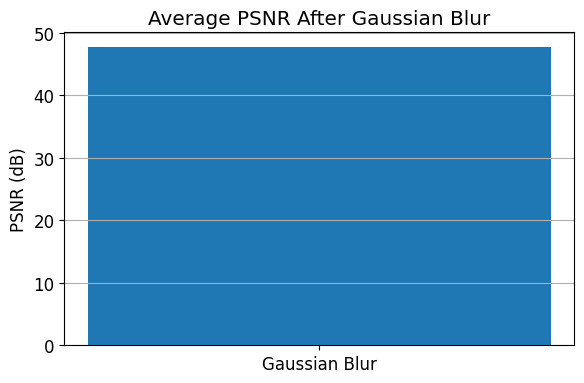

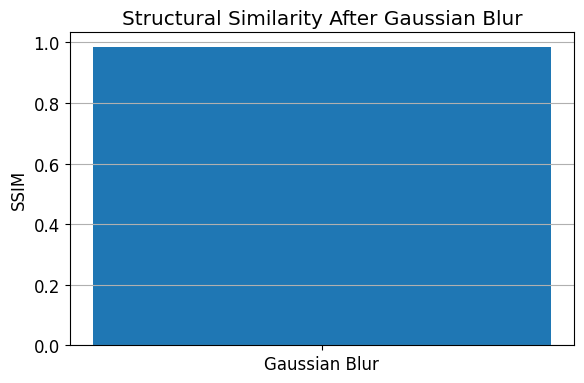

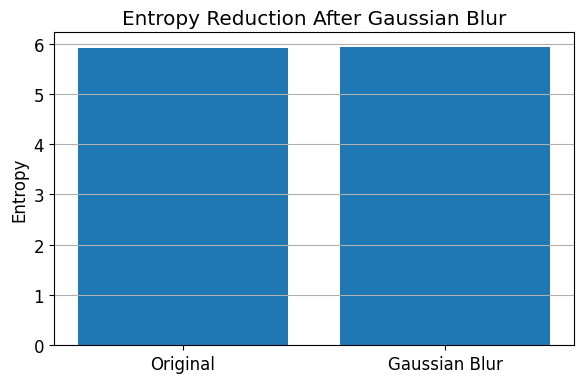

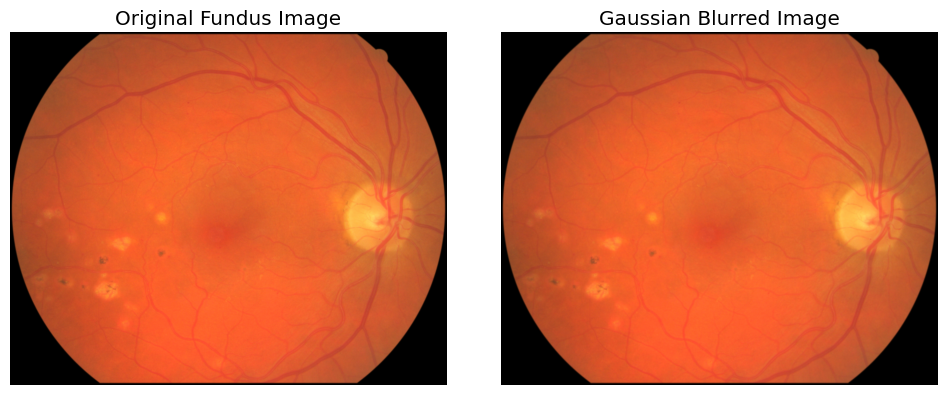

In [3]:
!pip install scikit-image
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.measure import shannon_entropy

# Publication-style plots
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
from google.colab import drive
drive.mount('/content/drive')
original_dir = "/content/drive/MyDrive/GlaucomaDataset/G1020/Images"
blurred_dir  = "/content/drive/MyDrive/GlaucomaDataset/G1020/blurred_Images"
output_csv   = "/content/drive/MyDrive/GlaucomaDataset/G1020/gaussian_blur_metrics.csv"
results = []

for img_name in os.listdir(original_dir):

    if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    orig_path = os.path.join(original_dir, img_name)
    blur_path = os.path.join(blurred_dir, img_name)

    if not os.path.exists(blur_path):
        print("Missing blurred image:", img_name)
        continue

    # Read images as grayscale
    orig = cv2.imread(orig_path, cv2.IMREAD_GRAYSCALE)
    blur = cv2.imread(blur_path, cv2.IMREAD_GRAYSCALE)

    if orig is None or blur is None:
        print("Failed to read:", img_name)
        continue

    # Ensure same size
    blur = cv2.resize(blur, (orig.shape[1], orig.shape[0]))

    # Compute metrics
    psnr_val = psnr(orig, blur, data_range=255)
    ssim_val = ssim(orig, blur, data_range=255)
    ent_orig = shannon_entropy(orig)
    ent_blur = shannon_entropy(blur)

    results.append([
        img_name,
        psnr_val,
        ssim_val,
        ent_orig,
        ent_blur
    ])

# Create DataFrame
df_metrics = pd.DataFrame(
    results,
    columns=[
        "Image",
        "PSNR (dB)",
        "SSIM",
        "Entropy (Original)",
        "Entropy (Gaussian Blur)"
    ]
)

df_metrics.head()
df_metrics.to_csv(output_csv, index=False)
print("Metrics saved to:", output_csv)
plt.figure(figsize=(6,4))
plt.bar(["Gaussian Blur"], [df_metrics["PSNR (dB)"].mean()])
plt.ylabel("PSNR (dB)")
plt.title("Average PSNR After Gaussian Blur")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,4))
plt.bar(["Gaussian Blur"], [df_metrics["SSIM"].mean()])
plt.ylabel("SSIM")
plt.title("Structural Similarity After Gaussian Blur")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
entropy_vals = [
    df_metrics["Entropy (Original)"].mean(),
    df_metrics["Entropy (Gaussian Blur)"].mean()
]

plt.figure(figsize=(6,4))
plt.bar(["Original", "Gaussian Blur"], entropy_vals)
plt.ylabel("Entropy")
plt.title("Entropy Reduction After Gaussian Blur")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
sample_img = df_metrics.iloc[0]["Image"]

orig = cv2.imread(os.path.join(original_dir, sample_img))
blur = cv2.imread(os.path.join(blurred_dir, sample_img))

orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(orig)
plt.title("Original Fundus Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blur)
plt.title("Gaussian Blurred Image")
plt.axis("off")

plt.tight_layout()
plt.show()
